In [10]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
from sklearn.model_selection import train_test_split

recession_vs_yield = pd.read_csv('data/preprocessed.csv', index_col = 'Date')
X = recession_vs_yield.drop(columns = ['USREC'])
y = recession_vs_yield['USREC']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

steps = [('imputer', SimpleImputer(strategy = 'median')), ('scaler', StandardScaler()), ('rgsr', LogisticRegression())]
pipe = Pipeline(steps)
pipe.fit(X_train,y_train)

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler()), ('rgsr', LogisticRegression())])

In [4]:
y_train_pred = pipe.predict(X_train)

In [5]:
from sklearn.metrics import accuracy_score

accuracy_score(y_train,y_train_pred)

0.8858131487889274

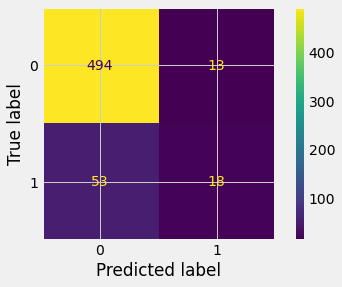

In [6]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc

conf = confusion_matrix(y_train,y_train_pred)
disp = ConfusionMatrixDisplay(conf)
disp.plot()

Aera under the curve:  0.8899


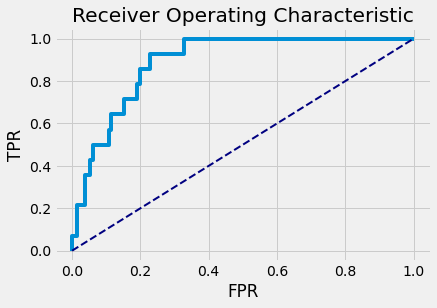

In [7]:
fpr, tpr, thresholds = roc_curve(y_test, pipe.predict_proba(X_test)[:, 1])
fig, ax = plt.subplots()
plt.plot(fpr,tpr)
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.title('Receiver Operating Characteristic');
aucscore = auc(fpr,tpr)
print('Aera under the curve: ',round(aucscore,4))

In [8]:
y_probas = pipe.predict_proba(X_test)[:,1]
custom_thresh_y_pred_test = [1 if y > 0.2 else 0 for y in y_probas]
y_probas = pipe.predict_proba(X_train)[:,1]
custom_thresh_y_pred_train = [1 if y > 0.2 else 0 for y in y_probas]

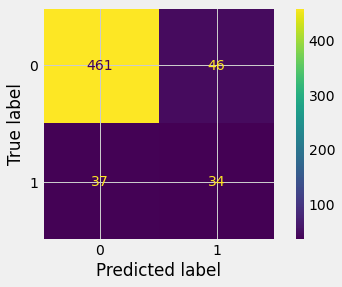

In [9]:
import numpy as np
conf = confusion_matrix(y_train,np.array(custom_thresh_y_pred_train))
disp = ConfusionMatrixDisplay(conf)
disp.plot()